Examine role of different M-A neural population parameters in behavioral prediction

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from disp import set_plot

cc = np.concatenate

In [2]:
df_ma_param = pd.read_csv('data/simple/neur/baker_ma_fit_param.csv')
ma_ffv_fit_data = np.load(f'data/simple/mlv/neur_basic/baker_ma_nm91_zh23_ffv_mn_1_ridge_alpha_10.npy', allow_pickle=True)[0]

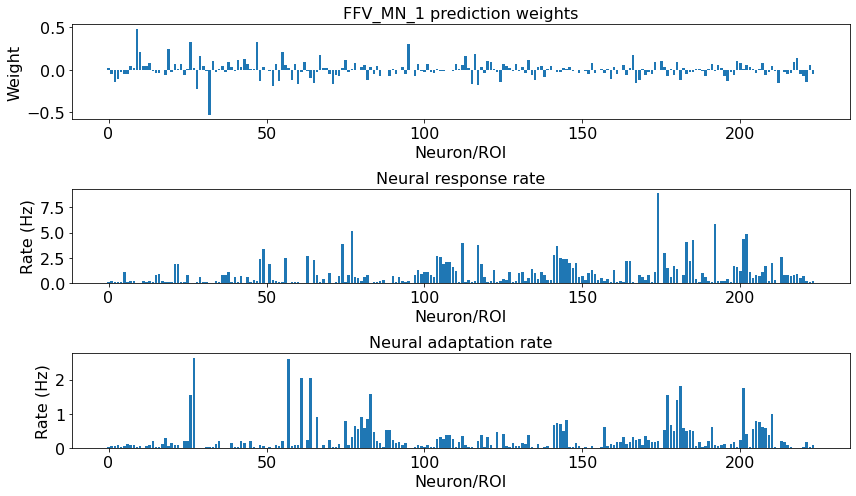

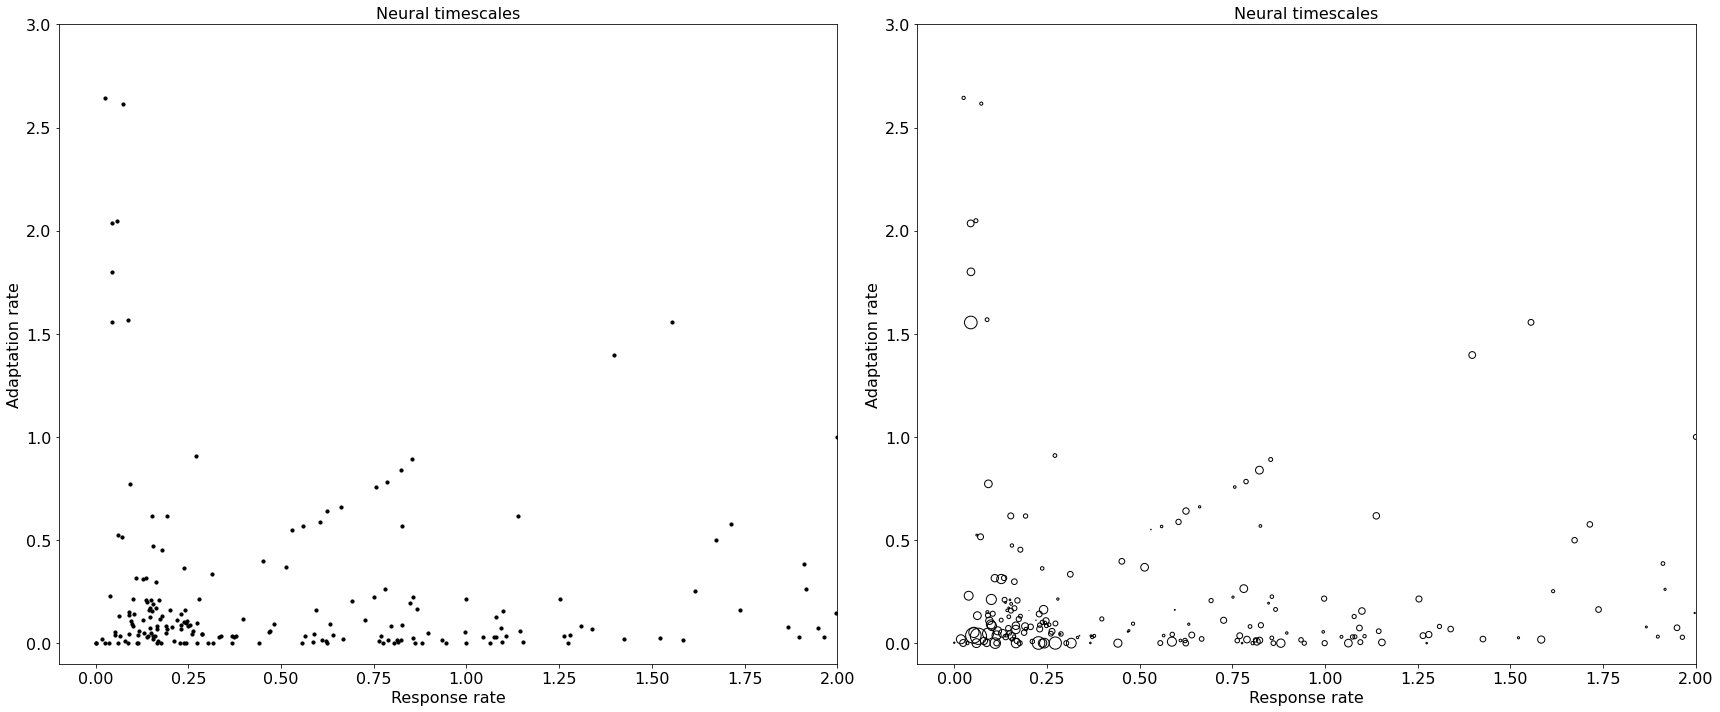

In [3]:
w_mn = ma_ffv_fit_data['w']['FFV'].mean(0)
x_ss = np.array(df_ma_param['X_S'])
x_ps = np.array(df_ma_param['X_P'])
sels = (np.abs(x_ps) - np.abs(x_ss)) / (np.abs(x_ss) + np.abs(x_ps))

fig, axs = plt.subplots(3, 1, figsize=(12, 7), tight_layout=True)
axs[0].bar(range(224), w_mn)
set_plot(axs[0], x_label='Neuron/ROI', y_label='Weight', title='FFV_MN_1 prediction weights', font_size=16)
axs[1].bar(range(224), 1/df_ma_param['TAU_R'])
set_plot(axs[1], x_label='Neuron/ROI', y_label='Rate (Hz)', title='Neural response rate', font_size=16)
axs[2].bar(range(224), 1/df_ma_param['TAU_A'])
set_plot(axs[2], x_label='Neuron/ROI', y_label='Rate (Hz)', title='Neural adaptation rate', font_size=16)

fig, axs = plt.subplots(1, 2, figsize=(24, 10), tight_layout=True)
axs[0].scatter(1/df_ma_param['TAU_R'], 1/df_ma_param['TAU_A'], c='k', s=10)
set_plot(axs[0], x_label='Response rate', y_label='Adaptation rate', title='Neural timescales', font_size=16)

axs[1].scatter(1/df_ma_param['TAU_R'], 1/df_ma_param['TAU_A'],  s=np.abs(w_mn)*500, facecolors='none', edgecolors='k')
set_plot(axs[1], x_label='Response rate', y_label='Adaptation rate', title='Neural timescales', font_size=16)

for ax in axs:
    set_plot(ax, x_lim=(-.1, 2), y_lim=(-.1, 3))

### Paper figure

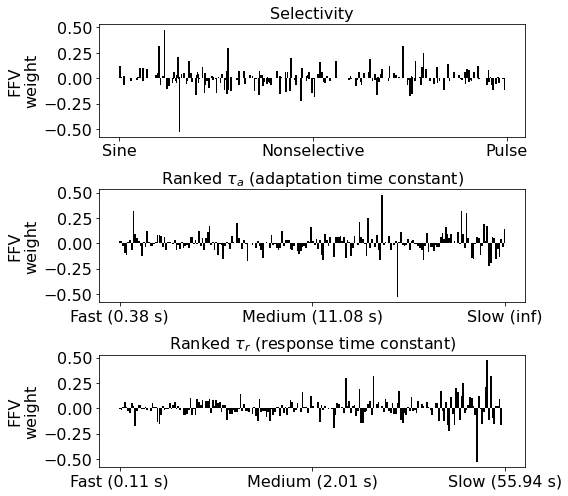

In [5]:
fig, axs = plt.subplots(3, 1, figsize=(8, 7), tight_layout=True)

axs[0].bar(sels, w_mn, width=2/224, color='k')
set_plot(axs[0], x_ticks=[-1, 0, 1], x_tick_labels=['Sine', 'Nonselective', 'Pulse'], title=r'Selectivity', y_label='FFV\nweight', font_size=16)

axs[1].bar(np.linspace(0, 1, 224), w_mn[np.argsort(df_ma_param['TAU_A'])], width=1/224, color='k')
set_plot(axs[1], x_ticks=[0, .5, 1], x_tick_labels=[f'Fast ({np.min(df_ma_param["TAU_A"]):.2f} s)', f'Medium ({np.median(df_ma_param["TAU_A"]):.2f} s)', f'Slow (inf)'], title=r'Ranked $\tau_a$ (adaptation time constant)', y_label='FFV\nweight', font_size=16)

axs[2].bar(np.linspace(0, 1, 224), w_mn[np.argsort(df_ma_param['TAU_R'])], width=1/224, color='k')
set_plot(axs[2], x_ticks=[0, .5, 1], x_tick_labels=[f'Fast ({np.min(df_ma_param["TAU_R"]):.2f} s)', f'Medium ({np.median(df_ma_param["TAU_R"]):.2f} s)', f'Slow ({np.median(sorted(df_ma_param["TAU_R"])[-5:]):.2f} s)'], title=r'Ranked $\tau_r$ (response time constant)', y_label='FFV\nweight', font_size=16)

# fig.savefig('ms/fig2d.svg')